In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
regre_df = pd.read_csv(r"C:\Users\RosaS\Desktop\base_datos_2008.csv", header= 0)
df = regre_df

In [24]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [25]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
973961,2008,2,5,2,703.0,710,759.0,815,MQ,3520,...,8.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1658440,2008,3,17,1,705.0,705,848.0,850,9E,5938,...,13.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6074129,2008,11,10,1,2044.0,2015,2205.0,2140,NW,1711,...,7.0,15.0,0,NaN,0,25.0,0.0,0.0,0.0,0.0
388308,2008,1,2,3,1855.0,1735,2007.0,1845,MQ,3429,...,8.0,16.0,0,NaN,0,17.0,0.0,2.0,0.0,63.0
3503020,2008,6,26,4,1322.0,1305,1745.0,1725,AA,1418,...,9.0,22.0,0,NaN,0,8.0,0.0,3.0,0.0,9.0


In [37]:
regress = linear_model.LinearRegression()
regress.fit(X,Y)
print("Coeficientes: ", regress.coef_)
Y_pred = regress.predict(X)

# Puntaje de Varianza. El mejor puntaje es un 1.0(modelo)
print('Variance score: %.2f' % r2_score(Y, Y_pred)) # se desea una varianza baja
#print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred)) #A non-negative floating point value (the best value is 0.0)

Coeficientes:  [1.02169205]
Variance score: 0.86


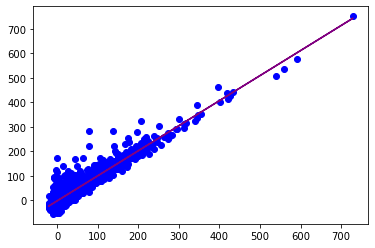

In [27]:
plt.scatter(X[1:10000],Y[1:10000],color = "blue") #puntos
plt.plot(X[1:10000],Y_pred[1:10000],color = "purple") #Recta de regresion
plt.show()

In [ ]:
#Variables regresoras (x) son categoricas :
#Aunque sean meses (1,2,3) se deben tratar como valores categorico porque sino le asiganra al mes 3 un mayor peso

In [44]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
dummies = pd.get_dummies(data = df[['Month','DayofMonth','DayOfWeek','Origin','Dest']])
X = dummies.add(X,fill_value=0)
X

,AirTime,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,DayofMonth_1,DayofMonth_10,...,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,TaxiIn,TaxiOut
973961,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0
1658440,134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0
6074129,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,15.0
388308,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0
3503020,112.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231203,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,10.0
1465308,59.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,14.0
136734,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,18.0
4246212,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0


In [40]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=648)

In [46]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
print("R cuadrado | Variance score",r2_score(Y,Y_pred))

R cuadrado | Variance score 0.1934503919064059


In [49]:
X = X.add(df[["DepDelay"]],fill_value=0)
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)

# Puntaje de Varianza. El mejor puntaje es un 1.0(modelo)
print('R cuadrado | Variance score: %.2f' % r2_score(Y, Y_pred))

Coeficientes:  [ 7.59310042e-01  1.88024446e+09  1.88024446e+09  1.88024446e+09
  1.88024446e+09  1.88024446e+09  1.88024446e+09  1.88024446e+09
 -1.84413936e+07 -1.84413934e+07 -1.84413935e+07 -1.84413937e+07
 -1.84413936e+07 -1.84413935e+07 -1.84413938e+07 -1.84413937e+07
 -1.84413937e+07 -1.84413937e+07 -1.84413938e+07 -1.84413937e+07
 -1.84413936e+07 -1.84413934e+07 -1.84413935e+07 -1.84413936e+07
 -1.84413937e+07 -1.84413938e+07 -1.84413936e+07 -1.84413933e+07
 -1.84413937e+07 -1.84413937e+07 -1.84413935e+07 -1.84413937e+07
 -1.84413932e+07 -1.84413935e+07 -1.84413935e+07 -1.84413935e+07
 -1.84413934e+07 -1.84413935e+07 -1.84413936e+07  4.97663975e-01
  2.84510605e+04  2.84455167e+04  2.84410453e+04  2.84514160e+04
  2.84471013e+04  2.84454359e+04  2.84298993e+04  2.84553211e+04
  2.84126288e+04  2.84330463e+04  2.84381687e+04  2.84467533e+04
  2.84279622e+04  2.84522381e+04  2.84425813e+04  2.84441493e+04
  2.84306221e+04  2.84379843e+04  2.84431202e+04  2.84485103e+04
  2.844318